In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [12]:
base_dir = os.path.dirname(os.getcwd()) 
file_path = os.path.join(base_dir, 'csv files', 'Competition_Results.csv')

df = pd.read_csv(file_path)

In [13]:
competition_map={
    'SEG001' : 'men_short',
    'SEG002' : 'men_free',
    'SEG003' : 'women_short',
    'SEG004' : 'women_free',
    'data130' : 'men_short',
    'data150' : 'men_free',
    'data230' : 'women_short',
    'data250' : 'women_free'
}

In [14]:
def add_segment(val):
    for key in competition_map.keys():
        if key in val:
            return competition_map[key]

In [15]:
df['segment'] = df['competition'].apply(add_segment)
df['gender'] = df['segment'].str.extract(r'(men|women)')
df

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.2,Judge No.3,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,final_element_score,segment,gender
0,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,4T+3T,...,4.0,2.0,3.0,2.0,3.0,4.0,4.0,16.82,men_short,men
1,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,4S,...,3.0,3.0,1.0,2.0,3.0,2.0,3.0,12.06,men_short,men
2,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,FCSp4,...,3.0,3.0,2.0,2.0,3.0,3.0,3.0,4.07,men_short,men
3,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,3A,...,3.0,1.0,1.0,2.0,2.0,1.0,3.0,10.29,men_short,men
4,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,CSSp4,...,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.77,men_short,men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18874,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,ChSq1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.07,women_free,women
18875,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,1Lo,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.55,women_free,women
18876,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,2A+2T,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.11,women_free,women
18877,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3Sq+2T,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,4.01,women_free,women


<function matplotlib.pyplot.show(close=None, block=None)>

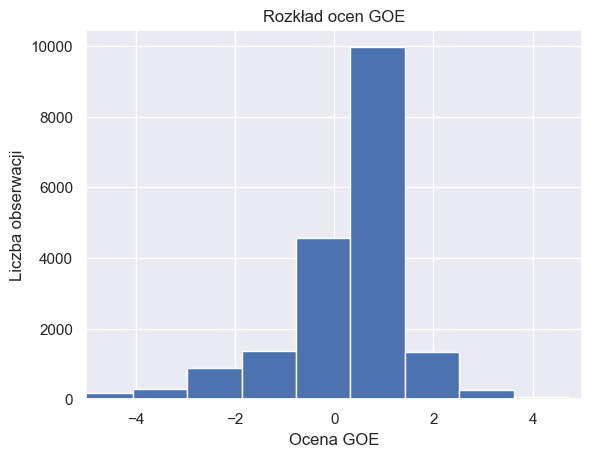

In [16]:
plt.hist(df['goe'])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')
plt.show

In [17]:
jumps = ['A', 'Lo', 'S', 'T', 'F', 'Lz']
spins = ['Sp']
steps = ['StSq']
choreo = ['ChSq']

In [18]:
non_jumps = spins + steps + choreo
pattern = '|'.join(non_jumps)
jumps_df = df[~df['element'].str.contains(pattern, na=False)]
jumps_df

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.2,Judge No.3,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,final_element_score,segment,gender
0,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,4T+3T,...,4.0,2.0,3.0,2.0,3.0,4.0,4.0,16.82,men_short,men
1,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,4S,...,3.0,3.0,1.0,2.0,3.0,2.0,3.0,12.06,men_short,men
3,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,3A,...,3.0,1.0,1.0,2.0,2.0,1.0,3.0,10.29,men_short,men
7,2,Mark KONDRATIUK,RUS,25,99.06,56.59,42.47,0.0,ec2022SEG001OF,4T,...,3.0,3.0,4.0,2.0,3.0,3.0,2.0,12.49,men_short,men
8,2,Mark KONDRATIUK,RUS,25,99.06,56.59,42.47,0.0,ec2022SEG001OF,3A,...,2.0,2.0,3.0,3.0,3.0,2.0,3.0,10.17,men_short,men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18871,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3Lz!,...,-2.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,5.39,women_free,women
18872,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3F,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,5.53,women_free,women
18875,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,1Lo,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.55,women_free,women
18876,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,2A+2T,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.11,women_free,women


Text(0, 0.5, 'Liczba obserwacji')

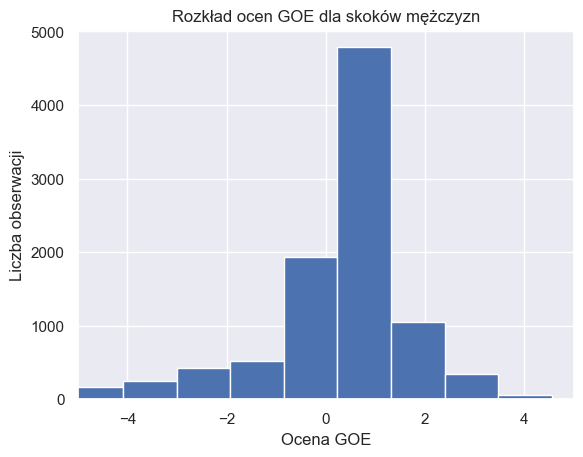

In [19]:
plt.hist(df['goe'][df['segment'].isin(['men_short', 'men_free'])])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE dla skoków mężczyzn')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')

Text(0, 0.5, 'Liczba obserwacji')

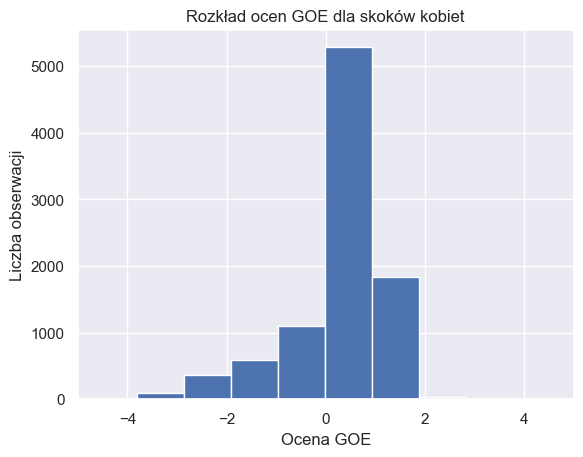

In [20]:
plt.hist(df['goe'][df['segment'].isin(['women_short', 'women_free'])])
plt.xlim(-5, 5)
plt.title('Rozkład ocen GOE dla skoków kobiet')
plt.xlabel('Ocena GOE')
plt.ylabel('Liczba obserwacji')

In [21]:
len(df['competition'].unique())

129

In [27]:
winners_df = df.loc[df.groupby('competition')['total'].idxmax()]
winners_df['year'] = winners_df['competition'].str.extract(r'(\d{4})')
winners_df


,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.3,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,final_element_score,segment,gender,year
0,1,Andrei MOZALEV,RUS,33,99.76,56.73,43.03,0.0,ec2022SEG001OF,4T+3T,...,2.0,3.0,2.0,3.0,4.0,4.0,16.82,men_short,men,2022
7203,1,Mark KONDRATIUK,RUS,23,187.50,97.48,90.02,0.0,ec2022SEG002OF,4T,...,0.0,1.0,1.0,3.0,3.0,4.0,11.13,men_free,men,2022
231,1,Kamila VALIEVA,RUS,35,90.45,51.73,38.72,0.0,ec2022SEG003OF,3A,...,3.0,4.0,4.0,5.0,5.0,5.0,11.54,women_short,women,2022
7491,1,Kamila VALIEVA,RUS,24,168.61,94.58,75.03,-1.0,ec2022SEG004OF,4S,...,4.0,5.0,4.0,5.0,5.0,4.0,14.13,women_free,women,2022
483,1,Adam SIAO HIM FA,FRA,26,96.53,52.75,43.78,0.0,ec2023SEG001OF,4T+3T,...,1.0,3.0,2.0,2.0,1.0,2.0,15.33,men_short,men,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18015,1,Kaori SAKAMOTO,JPN,21,149.67,75.08,74.59,0.0,wc2024SEG004OF,FCCoSp3,...,1.0,0.0,1.0,1.0,0.0,2.0,3.26,women_free,women,2024
6699,1,Ilia MALININ,USA,38,110.41,64.21,46.20,0.0,wc2025SEG001OF,4F,...,3.0,3.0,4.0,4.0,4.0,4.0,15.24,men_short,men,2025
18303,1,Ilia MALININ,USA,24,208.15,116.91,91.24,0.0,wc2025SEG002OF,ChSq1,...,3.0,1.0,1.0,2.0,2.0,1.0,3.93,men_free,men,2025
6972,1,Alysa LIU,USA,18,74.58,40.80,33.78,0.0,wc2025SEG003OF,3F+3T,...,2.0,3.0,2.0,2.0,2.0,3.0,10.64,women_short,women,2025


Text(0.5, 1.0, 'Program dowolny')

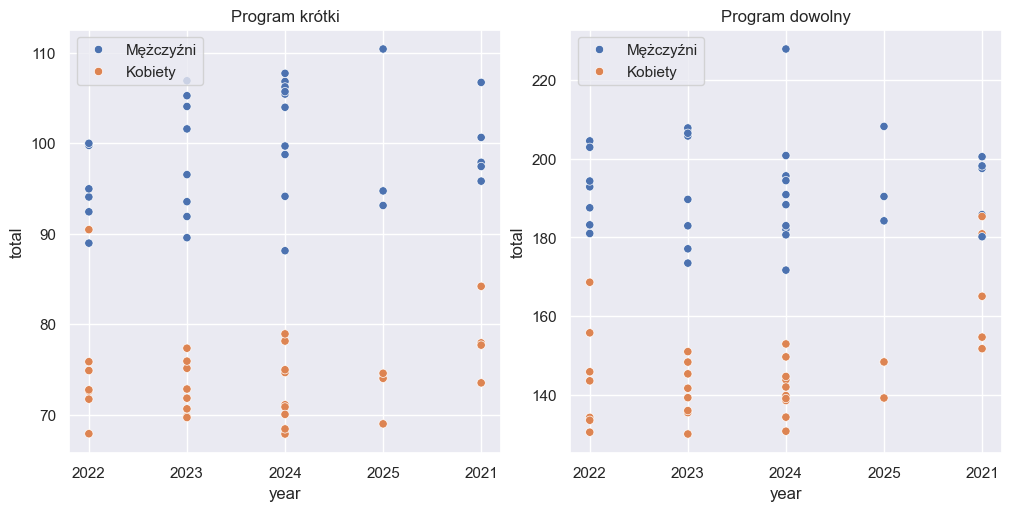

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)

sns.scatterplot(data=winners_df[winners_df['segment'].str.contains('short')], x='year', y='total', hue='gender', ax=ax[0])
sns.scatterplot(data=winners_df[winners_df['segment'].str.contains('free')], x='year', y='total', hue='gender', ax=ax[1])

custom_labels = {'men': 'Mężczyźni', 'women': 'Kobiety'}

handles0, labels0 = ax[0].get_legend_handles_labels()
labels0 = [custom_labels.get(label, label) for label in labels0]
ax[0].legend(handles=handles0, labels=labels0, title=None, loc='upper left')

handles1, labels1 = ax[1].get_legend_handles_labels()
labels1 = [custom_labels.get(label, label) for label in labels1]
ax[1].legend(handles=handles1, labels=labels1, title=None, loc='upper left')

ax[0].set_title("Program krótki")
ax[1].set_title("Program dowolny")


In [26]:
df_distinct = df.drop_duplicates(subset=['name', 'competition'])
df_distinct.sort_values('name')

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.2,Judge No.3,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,final_element_score,segment,gender
6818,18,Adam HAGARA,SVK,27,78.33,41.40,36.93,0.0,wc2025SEG001OF,3Lz+3T,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,11.28,men_short,men
18471,15,Adam HAGARA,SVK,7,154.29,81.86,72.43,0.0,wc2025SEG002OF,FCCoSp3,...,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.81,men_free,men
959,11,Adam HAGARA,SVK,21,74.97,40.55,34.42,0.0,ec2024SEG001OF,3F+3T,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,10.48,men_short,men
6657,35,Adam HAGARA,SVK,24,65.37,32.15,33.22,0.0,wc2024SEG001OF,3F+3T,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,10.48,men_short,men
7935,15,Adam HAGARA,SVK,4,124.57,67.60,56.97,0.0,ec2023SEG002OF,CCoSp4,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.95,men_free,men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,22,Ze Zeng FANG,MAS,6,46.37,22.44,25.93,-2.0,fc2025SEG001OF,3Lz,...,-2.0,-2.0,-3.0,-3.0,-1.0,-2.0,-2.0,4.64,men_short,men
10827,21,Ze Zeng FANG,MAS,1,105.66,54.60,53.06,-2.0,fc2025SEG002OF,FCCoSp4V,...,0.0,0.0,0.0,0.0,-1.0,-3.0,-1.0,2.52,men_free,men
2408,23,Ze Zeng FANG,MAS,1,54.99,27.92,27.07,0.0,fc2024SEG001OF,3T+3T,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.46,men_short,men
2688,10,Zhiming PENG,CHN,5,70.21,39.73,30.48,0.0,fc2025SEG001OF,4S,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,8.73,men_short,men


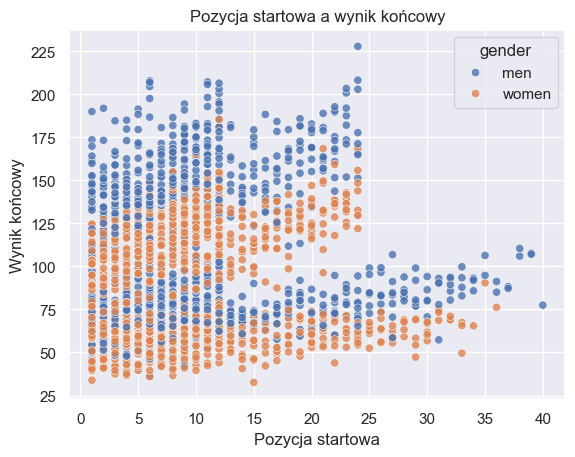

In [34]:
#plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_distinct, x=df_distinct['startnr'], y=df_distinct['total'], hue='gender', alpha=0.8)
plt.xlabel('Pozycja startowa')
plt.ylabel('Wynik końcowy')
plt.title('Pozycja startowa a wynik końcowy')
#plt.grid(True)
plt.show()